In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
import seaborn as sns
from sklearn.datasets import load_boston
import pandas as pd 
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict,train_test_split, KFold, ShuffleSplit


%matplotlib notebook 



## Cross Validation

### Train- Test Split

In order to tune the model to find the structure in the data in the best possible fashion, we must use the existing data to identify settings for the model’s parameters that yield the best and most realistic predictive performance.

Traditionally, this has been achieved by splitting the existing data into training and test sets. The training set is used
to build and tune the model and the test set is used to estimate the model’s predictive performance. Modern approaches to model building split the data into multiple training and testing sets, which have been shown to often find more optimal tuning parameters and give a more accurate representation of the model’s predictive performance.

To avoid over-fitting, we use a general model building approach that encompasses model tuning and model evaluation
with the ultimate goal of finding the reproducible structure in the data. This approach entails splitting existing data into distinct sets for the purposes of tuning model parameters and evaluating model performance. The choice of data splitting method depends on characteristics of the existing data such as its size and structure.

Below is an example of how test train split can be done in python
 
take the code below and run it in the cell- 

```python 


#load boston dataset using boston_dataset.feature_names
boston_dataset = datasets.load_boston()
boston_data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston_data['MEDV'] = boston_dataset.target

#create X and y as input and output vectors
X = boston_data[['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT']]
y = boston_data[['MEDV']]

# Write code below to create train-test split
#Use sklearn.modelselection. train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
X_train.head()

```



In [2]:
# run test train split code here 


In the above, example we took the boston dataset and broke it down into a test set with 30% of the examples and 70% of the examples in the training set. This breakdown allows us to train the model on the training set and run it on the test set. One should never train the model on examples in the test set. 

What does that mean? 

It means that for example, in the context of what we have learned so far, we should never run the fit function on the test set data in linear regression. Just the predict function. 

We expect the test set metric scores, accuracy or mean squared error(in case of regression) to lower than than the training set accuracy score. This is because the test set may have data the model has not seen before.  For example, if your house price variation is say 10,000 dollars based on location and the test set has examples where that variation is far larger then the predicted value of the house price will be lower than the actual value in the test set. Hence, the mean squared error will be higher in the test set. 


Now what if the test set of example that the train data does not contain at all? For example suppose you are training a model to fit the boston housing dataset and the test set has house prices out of the range of the the training set entirely. Also, suppose these are not outliers. Since we are doing a random train-test split this can easily happen. Also for smaller datasets, this can definitely happen where your model may miss some key examples that it can learn from due to the test train split. 

In such scenarios, we can use K-fold cross validation. K-fold cross validation is useful especially when 

- You have a small dataset and partation into test and train is not feasible<br>
- you want to check how much variation is there in the model <br>

So what is k fold cross validation- Rather than splitting the data into a single test train split, we split it into multiple sets. For example, we may choose to split the dataset into 5 sets. We set the first set as the validation set and train a model. Then we choose the second set as the validation set and train a model on that and so on. Finally, iterating through the sets, 5 models will have been trained and subsequently the accuracies and the error from the 5 validation sets will also be availaible. On this basis we can easily check if the variation major or minor. If for example, for the 5 models we have an $r^2$ score of (0.8,0.9,0.87,0.89,0.91) then the model variation is minor. Suppose in one of the models the $r^2$ score is really tiny like 0.1 then we know that there is something wrong with that specific set of training data. In such cases we can go back and check our training data to make sure that there are no errors. 

The benefit of k fold cross validation is that it allows us to build a model using all the data that we have and especially with models which can be trained quickly cross validation works well. 










# K fold cross - Linear regression


In [3]:
# lr_cv = LinearRegression()
# scoring = {'mse':make_scorer(mean_squared_error, greater_is_better=True),'r2':'r2' }
# cross_validate(lr_cv, x_train_reshaped, y_train_reshaped, cv=5, scoring=scoring)


In [4]:
# cross_val_predict(lr_cv, x_test_reshaped, y_test_reshaped, cv=10)

##  Shampoo dataset - k fold


### Linear regression using the cross value function from sklearn

In [40]:
# import the shampoo sales dataset 
shampoo_data = pd.read_csv("shampoo_sales.csv")
sales_full = np.array(shampoo_data["Sales"].tolist()) 
sales_full_reshaped = sales_full.reshape(sales_full.shape[0], 1)
x_values_full = np.arange(0, sales_full.shape[0])
x_values_full_reshaped = x_values_full.reshape(x_values_full.shape[0],1)

lr_cv = LinearRegression()
# scoring = {'mse':make_scorer(mean_squared_error, greater_is_better=True),'r2':'r2' }
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)
cross_val_score(lr_cv, x_values_full_reshaped, sales_full_reshaped , cv=cv, scoring="r2")


array([0.78019485, 0.71121842, 0.72343515, 0.80901779, 0.82063236])

### Linear regression on the whole set with test train split 


In [6]:


# import both test and train data 
shampoo = pd.read_csv("datasets_Regression/Shampoo_train.csv")
shampoo_test = pd.read_csv("datasets_Regression/Shampoo_test.csv")

# get feature and target for training data
x_values = np.array(shampoo["x_values"].tolist())
sales = np.array(shampoo["sales"].tolist())

# get feature and target for test data 
x_values_test = np.array(shampoo_test["x_values"].tolist())
sales_test = np.array(shampoo_test["sales"].tolist())


#reshape the x values for the training and testing data 
x_values_reshaped = x_values.reshape(x_values.shape[0],1)
x_values_test_reshaped = x_values_test.reshape(x_values_test.shape[0],1)

# reshape sales y for test 
sales_test_reshaped = sales_test.reshape(sales_test.shape[0],1)

lr_single = LinearRegression()
lr_single.fit(x_values_reshaped, sales.reshape(sales.shape[0],1))
predicted_values_shampoo = lr_single.predict(x_values_test_reshaped)

print(r2_score(sales_test_reshaped, predicted_values_shampoo))

single_slope = lr_single.coef_
single_b = lr_single.intercept_
    
x_range = np.linspace(0,40,200)
single_model_line =  (single_slope*x_range) + single_b


0.8048567611386018


<IPython.core.display.Javascript object>


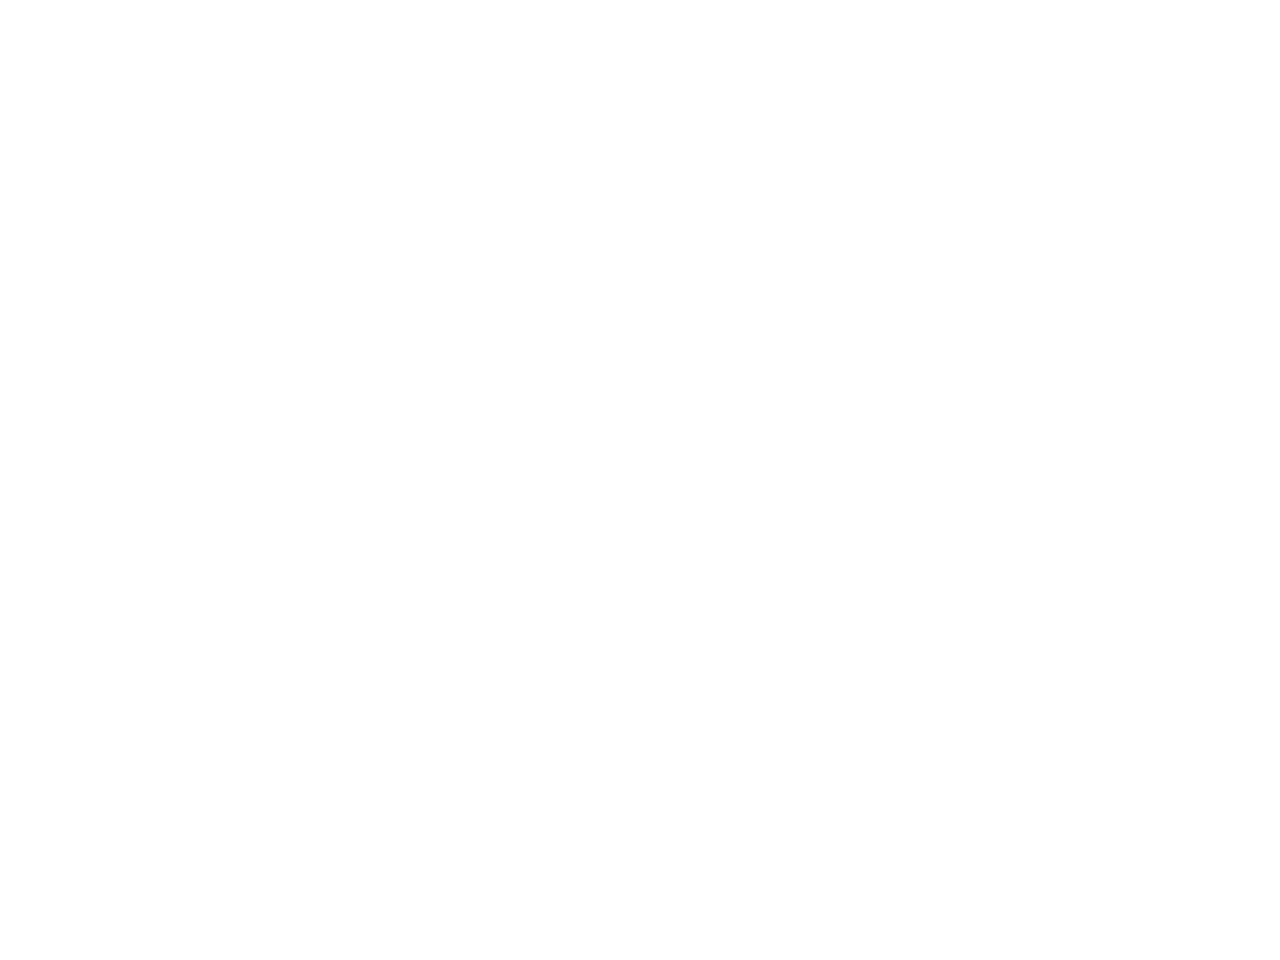

-0.019917215393320475


In [7]:
%matplotlib notebook
# manual k fold 
kf = KFold(n_splits=5)
kf.get_n_splits(x_values_full_reshaped)

plt.figure()
plt.scatter(x_values_full, sales_full)
plt.plot(x_range, single_model_line.reshape(single_model_line.shape[1]),  color="green")

counter = 0
for train_index, test_index in kf.split(x_values_full_reshaped):
    
    # generate test train 
    X_train, X_test = x_values_full_reshaped[train_index], x_values_full_reshaped[test_index]
    y_train, y_test = sales_full_reshaped[train_index], sales_full_reshaped[test_index]

    lr_mcv = LinearRegression()
    lr_mcv.fit(X_train, y_train)
    mcv_pred = lr_mcv.predict(X_test)
    
    
    mcv_slope = lr_mcv.coef_
    mcv_b = lr_mcv.intercept_
    
    
    mcv_line = (mcv_slope*x_range) + mcv_b
    
    if counter ==2: 

        plt.plot(x_range, mcv_line.reshape(mcv_line.shape[1]))

        plt.scatter(X_train,y_train, color="red")

        print(r2_score(y_test, mcv_pred))
        break

    counter = counter+1
  



# Lets try polynomial regression with cross validation



In [8]:
# import the shampoo sales dataset 
shampoo_data = pd.read_csv("shampoo_sales.csv")
sales_full = np.array(shampoo_data["Sales"].tolist()) 
sales_full_reshaped = sales_full.reshape(sales_full.shape[0], 1)
x_values_full = np.arange(0, sales_full.shape[0])
x_values_full_reshaped = x_values_full.reshape(x_values_full.shape[0],1)


poly_features_full = PolynomialFeatures(2)

x_poly_full = poly_features_full.fit_transform(x_values_full_reshaped)
lr_cv_poly = LinearRegression()
# scoring = {'mse':make_scorer(mean_squared_error, greater_is_better=True),'r2':'r2' }
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)

cross_val_score(lr_cv_poly, x_poly_full, sales_full_reshaped , cv=cv, scoring="r2")


array([0.76147779, 0.82527014, 0.86860703, 0.83677669, 0.85787503])

Yeah that didnt work out so well either. Turns out the best thing you can do for this dataset is to do linear regression with the test train split. It works the best. CV just does not work.

That is an interesting result. CV does not work for small datasets probably with a lot of variance. Lets try the boston housing dataset


<IPython.core.display.Javascript object>


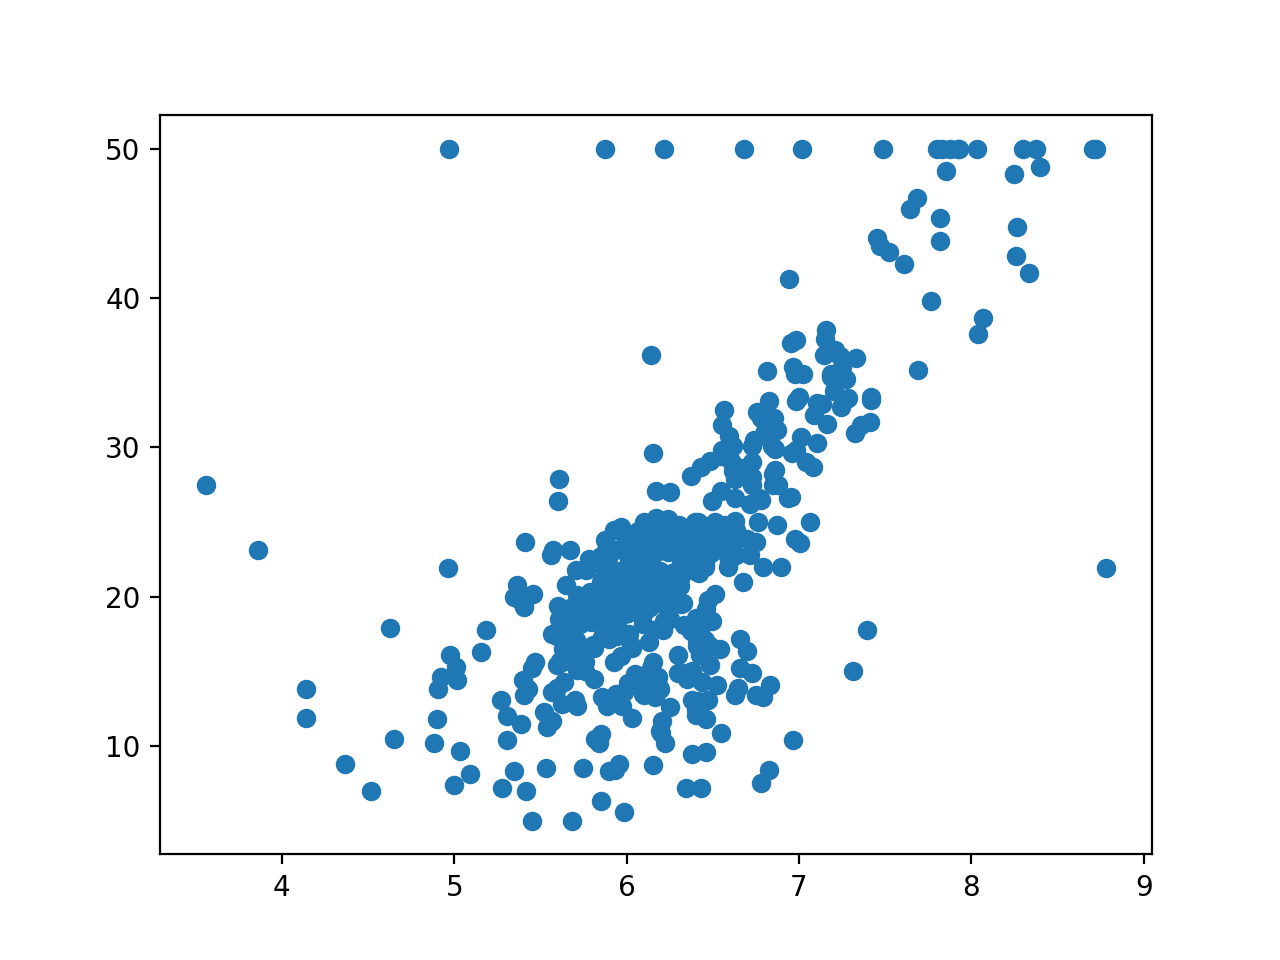

array([0.69907458, 0.59952198, 0.73550059, 0.48271336, 0.58971552])

In [9]:
%matplotlib notebook
boston_data = load_boston()
target = boston_data.target
data = boston_data.data

feature = data[:,5]

plt.figure()
plt.scatter(feature, target)
plt.show()


feature_reshaped = feature.reshape(feature.shape[0],1)
target_reshaped = target.reshape(target.shape[0],1)

poly_features_cv = PolynomialFeatures(6)
cv_poly = poly_features_cv.fit_transform(feature_reshaped)

lr_bs_cv = LinearRegression()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=5)

cross_val_score(lr_bs_cv, cv_poly, target_reshaped , cv=cv, scoring="r2")


In [10]:

lr_bs = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(feature_reshaped, target_reshaped, test_size=0.2)


poly_features_full = PolynomialFeatures(6)
full_poly = poly_features_full.fit_transform(X_train)

test_full_poly = poly_features_full.fit_transform(X_test)
lr_bs.fit(full_poly, y_train)

pred_y = lr_bs.predict(test_full_poly)

r2_score( y_test, pred_y )

0.6454335917122176

In [11]:
feature.shape[0]/5

101.2